In [ ]:
train_dataset = datasets.ImageFolder(root="", transform=transform)
test_dataset = datasets.ImageFolder(root="", transform=transform)

# Project - Coriandr VS Parsley
# Table of Content
<ul>
    <li><a href='#Introduction'>Introduction</a></li>
    <li><a href='#Dataset'>Dataset</a></li>
</ul>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [2]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
dataset = datasets.ImageFolder(root="./data", transform=transform)

In [4]:
data_loader = DataLoader(dataset, batch_size=32, shuffle=False)

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 2)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(x.size(0), -1)

        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

model = CNN().to(device)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

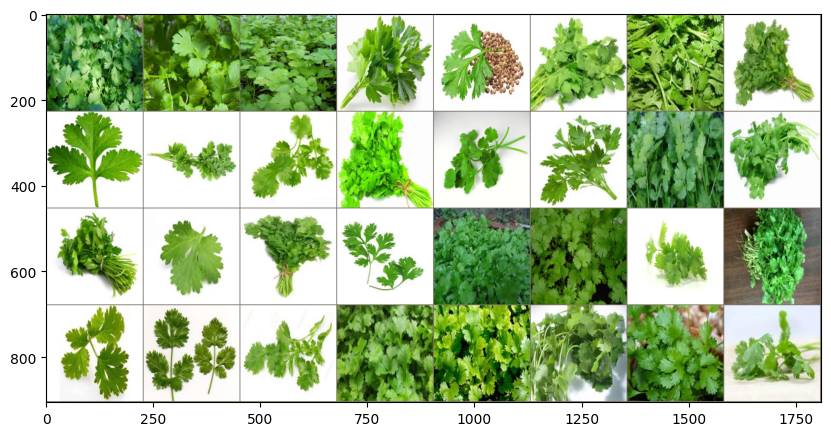

In [7]:
def imshow(img, title=None):
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    npimg = img.numpy()
    
    plt.figure(figsize=(10, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    if title is not None:
        plt.title(title)
    plt.show()

dataiter = iter(data_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [8]:
num_epochs = 60

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch ({epoch + 1}/{num_epochs}), loss: {running_loss / len(data_loader):.4f}")

Epoch (1/50), loss: 2.0420
Epoch (2/50), loss: 0.5941
Epoch (3/50), loss: 0.6902
Epoch (4/50), loss: 0.6886
Epoch (5/50), loss: 0.6915
Epoch (6/50), loss: 0.6914
Epoch (7/50), loss: 0.6871
Epoch (8/50), loss: 0.6897
Epoch (9/50), loss: 0.6815
Epoch (10/50), loss: 0.6871
Epoch (11/50), loss: 0.6837
Epoch (12/50), loss: 0.6848
Epoch (13/50), loss: 0.6818
Epoch (14/50), loss: 0.6817
Epoch (15/50), loss: 0.6789
Epoch (16/50), loss: 0.6749
Epoch (17/50), loss: 0.6721
Epoch (18/50), loss: 0.6786
Epoch (19/50), loss: 0.6773
Epoch (20/50), loss: 0.6802
Epoch (21/50), loss: 0.6676
Epoch (22/50), loss: 0.6590
Epoch (23/50), loss: 0.6642
Epoch (24/50), loss: 0.6609
Epoch (25/50), loss: 0.6516
Epoch (26/50), loss: 0.6606
Epoch (27/50), loss: 0.6442
Epoch (28/50), loss: 0.6292
Epoch (29/50), loss: 0.6401
Epoch (30/50), loss: 0.6273
Epoch (31/50), loss: 0.6131
Epoch (32/50), loss: 0.6102
Epoch (33/50), loss: 0.5938
Epoch (34/50), loss: 0.5901
Epoch (35/50), loss: 0.5709
Epoch (36/50), loss: 0.5691
E